In [1]:
from sklearn.preprocessing import MinMaxScaler
 
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
 
#不太熟悉numpy的小伙伴，能够判断data的结构吗？
#如果换成表是什么样子？
import pandas as pd
pd.DataFrame(data)
 
#实现归一化
scaler = MinMaxScaler()                             #实例化
scaler = scaler.fit(data)                           #fit，在这里本质是生成min(x)和max(x)
result = scaler.transform(data)                     #通过接口导出结果
result

result_ = scaler.fit_transform(data)                #训练和导出结果一步达成
 
scaler.inverse_transform(result)                    #将归一化后的结果逆转
 
#使用MinMaxScaler的参数feature_range实现将数据归一化到[0,1]以外的范围中
 
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler(feature_range=[5,10])         #依然实例化
result = scaler.fit_transform(data)                 #fit_transform一步导出结果
result
 
#当X中的特征数量非常多的时候，fit会报错并表示，数据量太大了我计算不了
#此时使用partial_fit作为训练接口
#scaler = scaler.partial_fit(data)

array([[ 5.  ,  5.  ],
       [ 6.25,  6.25],
       [ 7.5 ,  7.5 ],
       [10.  , 10.  ]])

In [2]:
import numpy as np
X = np.array([[-1, 2], [-0.5, 6], [0, 10], [1, 18]])
 
#归一化
X_nor = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_nor
 
#逆转归一化
X_returned = X_nor * (X.max(axis=0) - X.min(axis=0)) + X.min(axis=0)
X_returned


array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [3]:
from sklearn.preprocessing import StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
 
scaler = StandardScaler()                           #实例化
scaler.fit(data)                                    #fit，本质是生成均值和方差
 
scaler.mean_                                        #查看均值的属性mean_
scaler.var_                                         #查看方差的属性var_
 
x_std = scaler.transform(data)                      #通过接口导出结果
 
x_std.mean()                                        #导出的结果是一个数组，用mean()查看均值
x_std.std()                                         #用std()查看方差
 
scaler.fit_transform(data)                          #使用fit_transform(data)一步达成结果
 
scaler.inverse_transform(x_std)                     #使用inverse_transform逆转标准化

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [4]:
import pandas as pd
data = pd.read_csv(r".\Narrativedata.csv"
                   ,index_col=0
                  )#index_col=0将第0列作为索引，不写则认为第0列为特征
 
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [5]:
data.info()
#填补年龄
 
Age = data.loc[:,"Age"].values.reshape(-1,1)            #sklearn当中特征矩阵必须是二维
Age[:20]
 
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer()                              #实例化，默认均值填补
imp_median = SimpleImputer(strategy="median")           #用中位数填补
imp_0 = SimpleImputer(strategy="constant",fill_value=0) #用0填补
 
imp_mean = imp_mean.fit_transform(Age)                  #fit_transform一步完成调取结果
imp_median = imp_median.fit_transform(Age)
imp_0 = imp_0.fit_transform(Age)
 
imp_mean[:20]
imp_median[:20]
imp_0[:20]
 
#在这里我们使用中位数填补Age
data.loc[:,"Age"] = imp_median
 
data.info()
 
#使用众数填补Embarked
Embarked = data.loc[:,"Embarked"].values.reshape(-1,1)
imp_mode = SimpleImputer(strategy = "most_frequent")
data.loc[:,"Embarked"] = imp_mode.fit_transform(Embarked)
 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         714 non-null float64
Sex         891 non-null object
Embarked    889 non-null object
Survived    891 non-null object
dtypes: float64(1), object(3)
memory usage: 34.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         891 non-null float64
Sex         891 non-null object
Embarked    889 non-null object
Survived    891 non-null object
dtypes: float64(1), object(3)
memory usage: 34.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         891 non-null float64
Sex         891 non-null object
Embarked    891 non-null object
Survived    891 non-null object
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [6]:
import pandas as pd
data_ = pd.read_csv(r".\Narrativedata.csv"
                   ,index_col=0
                  )#index_col=0将第0列作为索引，不写则认为第0列为特征

data_.head()
 
data_.loc[:,"Age"] = data_.loc[:,"Age"].fillna(data_.loc[:,"Age"].median())
#.fillna 在DataFrame里面直接进行填补
 
data_.dropna(axis=0,inplace=True)
#.dropna(axis=0)删除所有有缺失值的行，.dropna(axis=1)删除所有有缺失值的列
#参数inplace，为True表示在原数据集上进行修改，为False表示生成一个复制对象，不修改原数据，默认False
# _data_ = data_.drop(axis=0,inplace=False)

from sklearn.preprocessing import LabelEncoder
 
y = data_.iloc[:,-1]                         #要输入的是标签，不是特征矩阵，所以允许一维
 
le = LabelEncoder()                         #实例化
le = le.fit(y)                              #导入数据
label = le.transform(y)                     #transform接口调取结果
 
le.classes_                                 #属性.classes_查看标签中究竟有多少类别
label                                       #查看获取的结果label
 
le.fit_transform(y)                         #也可以直接fit_transform一步到位
 
le.inverse_transform(label)                 #使用inverse_transform可以逆转

array(['No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'Unknown', 'Yes', 'No', 'No', 'No', 'Unknown', 'No', 'Yes', 'No',
       'Yes', 'Unknown', 'Yes', 'Yes', 'Yes', 'No', 'Unknown', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Unknown', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'Unknown', 'No', 'Unknown',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Unknown', 'Yes',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'Unknown', 'No', 'No', 'Yes', 'No', 'No', 'Ye

In [7]:
from sklearn.preprocessing import LabelEncoder
 
y = data.iloc[:,-1]                         #要输入的是标签，不是特征矩阵，所以允许一维
 
le = LabelEncoder()                         #实例化
le = le.fit(y)                              #导入数据
label = le.transform(y)                     #transform接口调取结果
 
le.classes_                                 #属性.classes_查看标签中究竟有多少类别
label                                       #查看获取的结果label
 
le.fit_transform(y)                         #也可以直接fit_transform一步到位
 
le.inverse_transform(label)                 #使用inverse_transform可以逆转

data.iloc[:,-1] = label                     #让标签等于我们运行出来的结果
 
data.head()
 
#如果不需要教学展示的话我会这么写：
from sklearn.preprocessing import LabelEncoder
data.iloc[:,-1] = LabelEncoder().fit_transform(data.iloc[:,-1])


In [8]:
from sklearn.preprocessing import OrdinalEncoder
 
#接口categories_对应LabelEncoder的接口classes_，一模一样的功能
data_ = data.copy()
 
data_.head()
 
OrdinalEncoder().fit(data_.iloc[:,1:-1]).categories_
 
data_.iloc[:,1:-1] = OrdinalEncoder().fit_transform(data_.iloc[:,1:-1])
 
data_.head()

,Age,Sex,Embarked,Survived
0,22.0,1.0,2.0,0
1,38.0,0.0,0.0,2
2,26.0,0.0,2.0,2
3,35.0,0.0,2.0,2
4,35.0,1.0,2.0,0


In [9]:
data.head()
 
from sklearn.preprocessing import OneHotEncoder
X = data.iloc[:,1:-1]
 
enc = OneHotEncoder(categories='auto').fit(X)
result = enc.transform(X).toarray()
result
 
#依然可以直接一步到位，但为了给大家展示模型属性，所以还是写成了三步
OneHotEncoder(categories='auto').fit_transform(X).toarray()
 
#依然可以还原
pd.DataFrame(enc.inverse_transform(result))
 
enc.get_feature_names()#返回每一个经过哑变量后生成稀疏矩阵列的名字
 
result
result.shape
 
#axis=1,表示跨行进行合并，也就是将两表左右相连，如果是axis=0，就是将量表上下相连
newdata = pd.concat([data,pd.DataFrame(result)],axis=1)
 
newdata.head()
 
newdata.drop(["Sex","Embarked"],axis=1,inplace=True)
 
newdata.columns = ["Age","Survived","Female","Male","Embarked_C","Embarked_Q","Embarked_S"]
 
newdata.head()

,Age,Survived,Female,Male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,0,0.0,1.0,0.0,0.0,1.0
1,38.0,2,1.0,0.0,1.0,0.0,0.0
2,26.0,2,1.0,0.0,0.0,0.0,1.0
3,35.0,2,1.0,0.0,0.0,0.0,1.0
4,35.0,0,0.0,1.0,0.0,0.0,1.0


In [12]:
#将年龄二值化
 
data_2 = data.copy()
 
from sklearn.preprocessing import Binarizer
X = data_2.iloc[:,0].values.reshape(-1,1)               #类为特征专用，所以不能使用一维数组
transformer = Binarizer(threshold=30).fit_transform(X)
 
data_2.iloc[:,0] = transformer
data_2.head()

,Age,Sex,Embarked,Survived
0,0.0,male,S,0
1,1.0,female,C,2
2,0.0,female,S,2
3,1.0,female,S,2
4,1.0,male,S,0


In [28]:
from sklearn.preprocessing import KBinsDiscretizer
 
X = data.iloc[:,0].values.reshape(-1,1) 
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
est.fit_transform(X)
 
#查看转换后分的箱：变成了一列中的三箱
set(est.fit_transform(X).ravel())
 
est = KBinsDiscretizer(n_bins=3, encode='onehot', strategy='uniform')
#查看转换后分的箱：变成了哑变量
est.fit_transform(X).toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [33]:
#导入数据，让我们使用digit recognizor数据来一展身手
 
import pandas as pd
data = pd.read_csv(r".\digit recognizor.csv")
 
X = data.iloc[:,1:]
y = data.iloc[:,0]
 
X.shape
 
"""
这个数据量相对夸张，如果使用支持向量机和神经网络，很可能会直接跑不出来。使用KNN跑一次大概需要半个小时。
用这个数据举例，能更够体现特征工程的重要性。
"""

'\n这个数据量相对夸张，如果使用支持向量机和神经网络，很可能会直接跑不出来。使用KNN跑一次大概需要半个小时。\n用这个数据举例，能更够体现特征工程的重要性。\n'

In [37]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()                      #实例化，不填参数默认方差为0
X_var0 = selector.fit_transform(X)                  #获取删除不合格特征之后的新特征矩阵
 
#也可以直接写成 X = VairanceThreshold().fit_transform(X)
 
X_var0.shape#(42000, 708)
pd.DataFrame(X_var0).head()

,0,1,2,3,4,5,6,7,8,9,...,698,699,700,701,702,703,704,705,706,707
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
import numpy as np
# X.var()#每一列的方差
X_fsvar = VarianceThreshold(np.median(X.var().values)).fit_transform(X)
 
X.var().values
 
np.median(X.var().values)
 
X_fsvar.shape#(42000, 392)

(42000, 392)

In [39]:
#若特征是伯努利随机变量，假设p=0.8，即二分类特征中某种分类占到80%以上的时候删除特征
X_bvar = VarianceThreshold(.8 * (1 - .8)).fit_transform(X)
X_bvar.shape

(42000, 685)

In [66]:
#KNN vs 随机森林在不同方差过滤效果下的对比
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
import numpy as np
 
X = data.iloc[:,1:]
y = data.iloc[:,0]
 
X_fsvar = VarianceThreshold(np.median(X.var().values)).fit_transform(X)

In [67]:
#======【TIME WARNING：35mins +】======#
cross_val_score(KNN(),X,y,cv=5).mean()
 
#python中的魔法命令，可以直接使用%%timeit来计算运行这个cell中的代码所需的时间
#为了计算所需的时间，需要将这个cell中的代码运行很多次（通常是7次）后求平均值，因此运行%%timeit的时间会
# 远远超过cell中的代码单独运行的时间
 
#======【TIME WARNING：4 hours】======#
%%timeit
cross_val_score(KNN(),X,y,cv=5).mean()


SyntaxError: invalid syntax (<ipython-input-67-05e3ca96f478>, line 9)

In [68]:
#======【TIME WARNING：20 mins+】======#
cross_val_score(KNN(),X_fsvar,y,cv=5).mean()
 
#======【TIME WARNING：2 hours】======#
%%timeit
cross_val_score(KNN(),X,y,cv=5).mean()

SyntaxError: invalid syntax (<ipython-input-68-ac43cbfd2470>, line 5)

In [46]:
cross_val_score(RFC(n_estimators=10,random_state=0),X,y,cv=5).mean()

0.9380003861799541

In [47]:
cross_val_score(RFC(n_estimators=10,random_state=0),X_fsvar,y,cv=5).mean()

0.9388098166696807

In [48]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
 
#假设在这里我一直我需要300个特征
X_fschi = SelectKBest(chi2, k=300).fit_transform(X_fsvar, y)
X_fschi.shape


(42000, 300)

In [49]:
cross_val_score(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()


0.9333098667649198

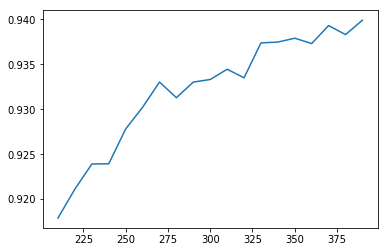

In [55]:
#======【TIME WARNING: 5 mins】======#
 
%matplotlib inline
import matplotlib.pyplot as plt
 
score = []
for i in range(390,200,-10):
    X_fschi = SelectKBest(chi2, k=i).fit_transform(X_fsvar, y)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()
    score.append(once)
plt.plot(range(390,200,-10),score)
plt.show()

In [56]:
chivalue, pvalues_chi = chi2(X_fsvar,y)
 
chivalue
 
pvalues_chi
 
#k取多少？我们想要消除所有p值大于设定值，比如0.05或0.01的特征：
k = chivalue.shape[0] - (pvalues_chi > 0.05).sum()
 
#X_fschi = SelectKBest(chi2, k=填写具体的k).fit_transform(X_fsvar, y)
#cross_val_score(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()


In [57]:
from sklearn.feature_selection import f_classif
 
F, pvalues_f = f_classif(X_fsvar,y)
 
F
 
pvalues_f
 
k = F.shape[0] - (pvalues_f > 0.05).sum()
 
#X_fsF = SelectKBest(f_classif, k=填写具体的k).fit_transform(X_fsvar, y)
#cross_val_score(RFC(n_estimators=10,random_state=0),X_fsF,y,cv=5).mean()

In [58]:
from sklearn.feature_selection import mutual_info_classif as MIC
 
result = MIC(X_fsvar,y)
 
k = result.shape[0] - sum(result <= 0)
 
#X_fsmic = SelectKBest(MIC, k=填写具体的k).fit_transform(X_fsvar, y)
#cross_val_score(RFC(n_estimators=10,random_state=0),X_fsmic,y,cv=5).mean()

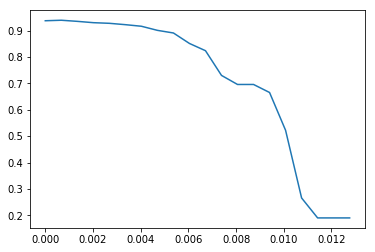

In [59]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC
 
RFC_ = RFC(n_estimators =10,random_state=0)
 
X_embedded = SelectFromModel(RFC_,threshold=0.005).fit_transform(X,y)
 
#在这里我只想取出来有限的特征。0.005这个阈值对于有780个特征的数据来说，是非常高的阈值，因为平均每个特征
# 只能够分到大约0.001的feature_importances_
 
X_embedded.shape
 
#模型的维度明显被降低了
#同样的，我们也可以画学习曲线来找最佳阈值
 
#======【TIME WARNING：10 mins】======#
 
import numpy as np
import matplotlib.pyplot as plt
 
RFC_.fit(X,y).feature_importances_
 
threshold = np.linspace(0,(RFC_.fit(X,y).feature_importances_).max(),20)
 
score = []
for i in threshold:
    X_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(X,y)
    once = cross_val_score(RFC_,X_embedded,y,cv=5).mean()
    score.append(once)
plt.plot(threshold,score)
plt.show()

In [60]:
X_embedded = SelectFromModel(RFC_,threshold=0.00067).fit_transform(X,y)
X_embedded.shape
 
cross_val_score(RFC_,X_embedded,y,cv=5).mean()

0.939905083368037

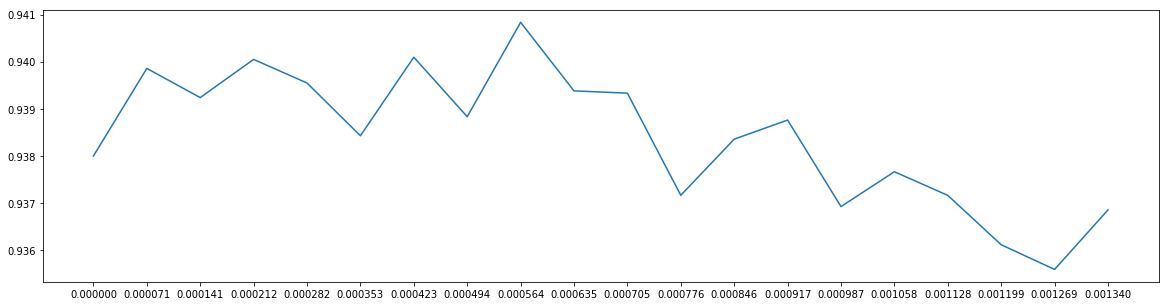

In [61]:
#======【TIME WARNING：10 mins】======#
score2 = []
for i in np.linspace(0,0.00134,20):
    X_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(X,y)
    once = cross_val_score(RFC_,X_embedded,y,cv=5).mean()
    score2.append(once)
plt.figure(figsize=[20,5])
plt.plot(np.linspace(0,0.00134,20),score2)
plt.xticks(np.linspace(0,0.00134,20))
plt.show()


In [62]:
X_embedded = SelectFromModel(RFC_,threshold=0.000564).fit_transform(X,y)
X_embedded.shape
 
cross_val_score(RFC_,X_embedded,y,cv=5).mean()
 
#=====【TIME WARNING：2 min】=====#
#我们可能已经找到了现有模型下的最佳结果，如果我们调整一下随机森林的参数呢？
cross_val_score(RFC(n_estimators=100,random_state=0),X_embedded,y,cv=5).mean()

0.9639525817795566

In [63]:
from sklearn.feature_selection import RFE
RFC_ = RFC(n_estimators =10,random_state=0)
selector = RFE(RFC_, n_features_to_select=340, step=50).fit(X, y)
 
selector.support_.sum()#340
 
selector.ranking_
 
X_wrapper = selector.transform(X)
 
cross_val_score(RFC_,X_wrapper,y,cv=5).mean()

0.9389522459432109

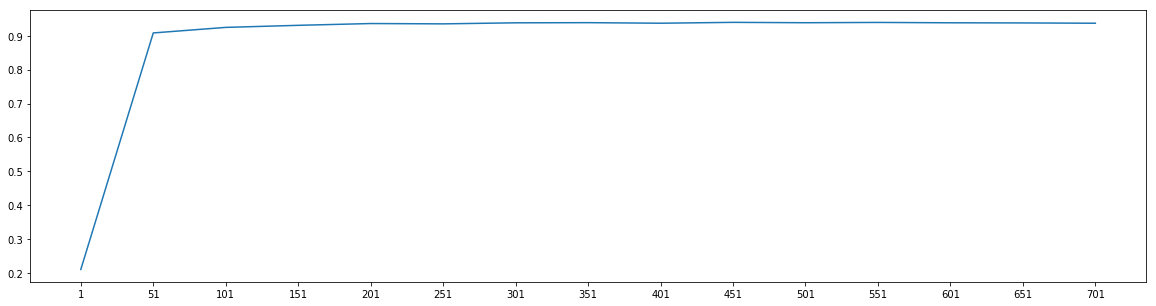

In [64]:
#======【TIME WARNING: 15 mins】======#
 
score = []
for i in range(1,751,50):
    X_wrapper = RFE(RFC_,n_features_to_select=i, step=50).fit_transform(X,y)
    once = cross_val_score(RFC_,X_wrapper,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,751,50),score)
plt.xticks(range(1,751,50))
plt.show()